### Condições Iniciais e de Contorno

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
L = 100  # Comprimento da barra (m)
alpha = 1  # Difusividade térmica
T0 = 10  # Temperatura inicial (°C)
N = 100  # Número de termos na série


### Função para calcular os coeficientes Cn

In [93]:
def calcular_coeficientes_Cn(N, L, T0):
    coeficientes = np.zeros(N)
    for n in range(1, N + 1):
        coeficientes[n - 1] = (20 * (1 - (-1) ** n) / (n * np.pi)) 
    return coeficientes


### Calcular os coeficientes Cn

In [94]:
coeficientes_Cn = calcular_coeficientes_Cn(N, L, T0)

### Função para calcular a temperatura em um ponto (x, t)

In [95]:
def calcular_temperatura(x, t, coeficientes, L, alpha):
    temperatura = 0
    for n in range(1, len(coeficientes) + 1):
        exponencial = np.exp(-((n * np.pi * alpha / L) ** 2 * t))
        seno = np.sin((n * np.pi * x) / L)
        temperatura += coeficientes[n - 1] * exponencial * seno
    return temperatura

### Calcular a temperatura ao longo do tempo em toda a barra

In [96]:
# Parâmetros para o grid
nx = 100  # Número de pontos no eixo x
nt = 1000  # Número de pontos no tempo
x_values = np.linspace(0, L, nx) # Criando pontos igualmente espaçados no eixo Posicao
t_values = np.linspace(0, 3000, nt) # Criando pontos igualmente espaçados no eixo Tempo
temperaturas = np.zeros((nt, nx))
for i, t in enumerate(t_values):
    for j, x in enumerate(x_values):
        temperaturas[i, j] = calcular_temperatura(x, t, coeficientes_Cn, L, alpha)

### Plotagem do gráfico

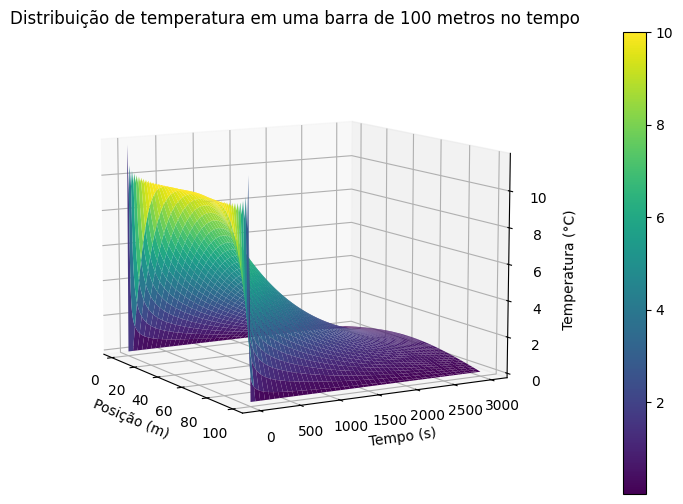

In [97]:
X, T = np.meshgrid(x_values, t_values) # Criando Grade Tridimensional
fig = plt.figure(figsize=(25, 6)) # Criando figura com tamanho de 30 x 8 polegadas
ax = fig.add_subplot(111, projection='3d') # Informa que é uma figura tridimencional
ax.view_init(elev=10, azim=-30)
superficie = ax.plot_surface(X, T, temperaturas, cmap='viridis') # Desenha uma superficie tridimencional
ax.set_xlabel('Posição (m)')
ax.set_ylabel('Tempo (s)')  
ax.set_zlabel('Temperatura (°C)') 
ax.set_title(f'Distribuição de temperatura em uma barra de {L} metros no tempo')
plt.colorbar(superficie)
plt.show()

### Transformando a temperatura em um gráfico de contorno para visualização 2D(Tempo, Espaço)

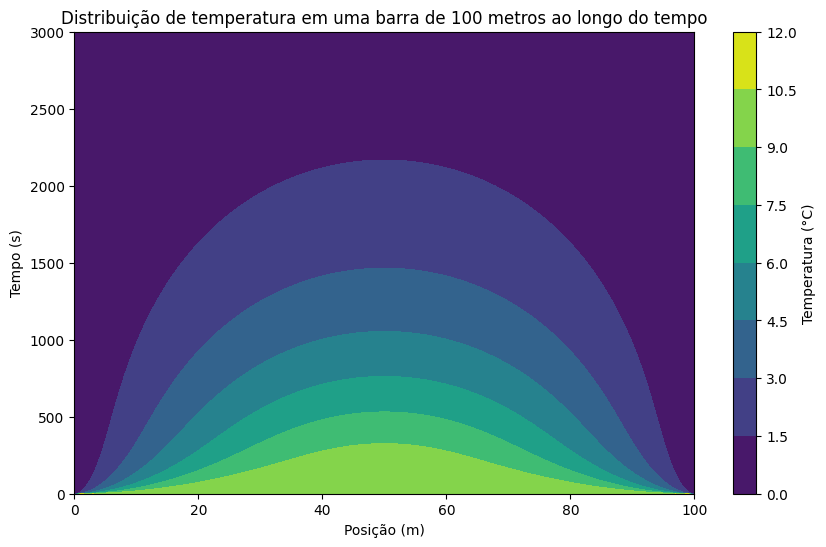

In [98]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, T, temperaturas, cmap='viridis')
plt.colorbar(contour).set_label('Temperatura (°C)')
plt.xlabel('Posição (m)')
plt.ylabel('Tempo (s)')
plt.title(f'Distribuição de temperatura em uma barra de {L} metros ao longo do tempo')
plt.show()

### Referências

http://mtm.ufsc.br/~daniel/matap/calor_dif_fin1.pdf

https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_do_calor

https://medium.com/@matiasortizdiez/beginners-introduction-to-natural-simulation-in-python-i-solving-the-heat-equation-bf0ae5d4c37f

https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a